## Running PySCF to populate the OpenFermion MolecularData class

The module run_pyscf.py provides a user-friendly way of running PySCF calculations in OpenFermion. The basic idea is that once one generates a MolecularData instance, one can then call PySCF with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to compute things about the molecule, update the MolecularData object, and save results of the calculation. The most common calculations users will want in OpenFermion would probably be self-consistent field (aka Hartree-Fock calculations). Our code uses these "SCF" calculations compute orbitals, integrals, Hartree-Fock energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers, CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. Note that the "delete_input" and "delete_output" options indicate whether to save automatically generated pyscf input files or not. To use this plugin, you will need to personally download PySCF.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. See the PySCF documentation for more information or consult and electronic structure theory expert.


At bond length of 0.275 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.46576369202201073 Hartree.
MP2 energy of -0.47148376317105634 Hartree.
FCI energy of -0.4733700032133248 Hartree.
Nuclear repulsion energy between protons is 1.924280766981818 Hartree.
Spatial orbital 0 has energy of -0.8173400009356641 Hartree.
Spatial orbital 1 has energy of 1.4209358488233526 Hartree.

At bond length of 0.35 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.7804549020715255 Hartree.
MP2 energy of -0.7869330192714304 Hartree.
FCI energy of -0.7892693924044141 Hartree.
Nuclear repulsion energy between protons is 1.5119348883428574 Hartree.
Spatial orbital 0 has energy of -0.7738122191065239 Hartree.
Spatial orbital 1 has energy of 1.2661364723625192 Hartree.

At bond length of 0.425 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.9500662941995572 Hartree.
MP2 energy of -0.9574677535632835 Hartree.
FCI energy of -0.9603937574322665 Hartree.
Nuclear repulsion energ


At bond length of 1.8499999999999999 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.8168422922508727 Hartree.
MP2 energy of -0.8905026988722495 Hartree.
FCI energy of -0.9578329678685789 Hartree.
Nuclear repulsion energy between protons is 0.28604173563243246 Hartree.
Spatial orbital 0 has energy of -0.29153460879374643 Hartree.
Spatial orbital 1 has energy of 0.13575653449662808 Hartree.

At bond length of 1.9249999999999998 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.7997638281473747 Hartree.
MP2 energy of -0.8807342139894813 Hartree.
FCI energy of -0.9527614857390079 Hartree.
Nuclear repulsion energy between protons is 0.27489725242597407 Hartree.
Spatial orbital 0 has energy of -0.28012953152597103 Hartree.
Spatial orbital 1 has energy of 0.12169823435424161 Hartree.

At bond length of 1.9999999999999998 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.7837926542773529 Hartree.
MP2 energy of -0.8725118764674618 Hartree.
FCI energy of -0.9486

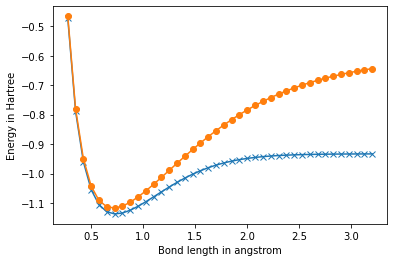

In [2]:
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
n_points = 40
bond_length_interval = 3.0 / n_points

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point) + 0.2
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run pyscf.
    molecule = run_pyscf(molecule,
                         run_scf=run_scf,
                         run_mp2=run_mp2,
                         run_cisd=run_cisd,
                         run_ccsd=run_ccsd,
                         run_fci=run_fci)

    # Print out some results of calculation.
    print('\nAt bond length of {} angstrom, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()